# Project

1. 관심 데이터 선정
 - AIHUB에서 한글 -> 영어 말뭉치 번역 데이터 선택
 

2. 데이터 선정이유
 - 파파고와 같은 번역 프로그램을 만들때, 트랜스포머와 RNN 둘 중 어느 모델이 더 적합할지 궁금했다.
 - 자료 출처 : https://aihub.or.kr/

3. 데이터를 이용한 가설 수립
 - 비슷한 조건에서 두 모델을 가동했을때, 트랜스포머 모델이 좀 더 나은 번역을 해낼 것 이다.

4. 데이터 전처리
 - 데이터 양이 많을 경우 학습시간도 오래 걸릴뿐 아니라 메모리 부족으로 토큰화나 모델가동에 에러가 발생하였음.
 - 1,210,529 데이터를 10,000 개의 데이터만 사용하는 것으로 축약함.

5. 딥러닝 방식 적용
 - transformer
 - RNN

6. 모델 검증(Validation)

데이터 구성
- sn - 데이터 번호
- file_name - 정제된 원본 문서명
- data_set - 기술과학/사회과학 구분
- domain - 데이터 대분야
- subdomain - 데이터 소분야
- source - 원문 출처
- ko - 한국어 문장
- mt - 기계번역 문장
- en - 영어 문장
- source_language - 원문 언어 코드
- target_language - 번역문 언어 코드
- license - 라이선스
- style - 문체

전처리 과정시 해당 전처리를 왜 사용했는지 이유를 알려준 점이 좋았습니다. 다만 프로젝트 주제를 설정한 이유가 불명확한 점이 아쉽습니다. 문제 설정 이유와 모델 구조에 대해 좀 더 보완한다면 더 좋을 것 같습니다.

# 데이터셋 준비

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [3]:
train_csv = '1113_social_train_set_1210529.csv'
val_csv = '1113_social_valid_set_151316.csv'

train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)

print(train_df.shape, val_df.shape)

(1210529, 13) (151316, 13)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210529 entries, 0 to 1210528
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   sn               1210529 non-null  object
 1   file_name        1210529 non-null  object
 2   data_set         1210529 non-null  object
 3   domain           1210529 non-null  object
 4   subdomain        1210529 non-null  object
 5   source           1210529 non-null  object
 6   ko               1210529 non-null  object
 7   mt               1210529 non-null  object
 8   en               1210529 non-null  object
 9   source_language  1210529 non-null  object
 10  target_language  1210529 non-null  object
 11  license          1210529 non-null  object
 12  style            1210529 non-null  object
dtypes: object(13)
memory usage: 120.1+ MB


In [5]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151316 entries, 0 to 151315
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sn               151316 non-null  object
 1   file_name        151316 non-null  object
 2   data_set         151316 non-null  object
 3   domain           151316 non-null  object
 4   subdomain        151316 non-null  object
 5   source           151316 non-null  object
 6   ko               151316 non-null  object
 7   mt               151316 non-null  object
 8   en               151316 non-null  object
 9   source_language  151316 non-null  object
 10  target_language  151316 non-null  object
 11  license          151316 non-null  object
 12  style            151316 non-null  object
dtypes: object(13)
memory usage: 15.0+ MB


In [7]:
# 데이터 정리
train_df = train_df[:10000]
val_df = val_df[:4000]

train_df = train_df[["ko","en"]]
val_df = val_df[["ko","en"]]

In [8]:
print(train_df.shape)
train_df.head()

(10000, 2)


,ko,en
0,제2항을 함께 두는 것이 적절한지에 대하여 논의 과정에서 의문이 제기되기도 하였다.,"In the course of the discussion, questions wer..."
1,문제는 거래가 끊어진 경우에는 실제 거래가 이뤄지지 않기 때문에 이러한 실거래가 자...,"If the transaction is cut off, the actual tran..."
2,이러한 공공 부문 이동기기 개인 영상정보 규율의 문제점을 개선하기 위해 보호 체계 ...,This discussed ways to improve the protection ...
3,그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자...,Since the contents are not easily known and in...
4,매칭정보를 획득하게 되면 통상 ‘ARP spoofing’이라는 해킹기법을 사용한다.,"When matching information is obtained, a hacki..."


In [9]:
print(val_df.shape)
val_df.head()

(4000, 2)


,ko,en
0,"국경 없는 인터넷의 특 성을 감안하여, 저작권법의 속지적인 특성에도 불구하고 미국 ...",Considering the type regarding the Internet wi...
1,학습자들이 제시한 건의사항을 해결하기 위해 다음과 같은 논의가 필요하다.,The following discussion is needed to resolve ...
2,2011년에 발생한 저축은행 부실사태 이후 관련 연구가 종종 이뤄지고 있다.,Some studies on the period after the savings b...
3,기업의 성장 측정 방식을 선택함에 있어 기업 규모에 따른 편향적인 결과가 도출되는 ...,In selecting a company's growth measurement me...
4,"1인 여행객 중 여성은 52.3%, 남성은 47.7%로 여성이 상대적으로 나 홀로 ...","Among solo travelers, 52.3% were female and 47..."


### transformer

개념 이해를 돕기위한 트랜스포머 이론 예시
(참고 사이트 : https://wikidocs.net/31379)

In [10]:
# Positional Encoding (위치 인코딩)

class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])

    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    angle_rads = np.zeros(angle_rads.shape)
    angle_rads[:, 0::2] = sines
    angle_rads[:, 1::2] = cosines
    pos_encoding = tf.constant(angle_rads)
    pos_encoding = pos_encoding[tf.newaxis, ...]

    print(pos_encoding.shape)
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

(1, 50, 128)


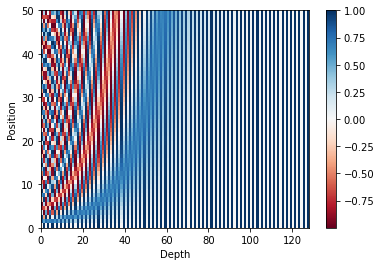

In [11]:
# 문장의 길이 50, 임베딩 벡터의 차원 128
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

### 어텐션(Attention)

In [12]:
# 스케일드 닷-프로덕트 어텐션(Scaled dot-product Attention)

def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 스케일링
  # dk의 루트값으로 나눠준다.
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

In [13]:
# 멀티 헤드 어텐션(Multi-head Attention)

class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

### 패딩 마스크(Padding Mask)

In [14]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

### 잔차 연결(Residual connection)과 층 정규화(Layer Normalization)

### 인코더 구현하기

In [15]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

인코더 쌓기

In [16]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

### 디코더 구현하기

In [17]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

In [18]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

### 디코더 쌓기

In [19]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

### 트랜스포머 구현하기

In [20]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

### 트랜스포머 하이퍼파라미터 정하기

In [21]:
!pip install pydot

In [22]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

(1, 9000, 128)
(1, 9000, 128)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### 손실 함수 정의하기

In [23]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

### 학습률

Text(0.5, 0, 'Train Step')

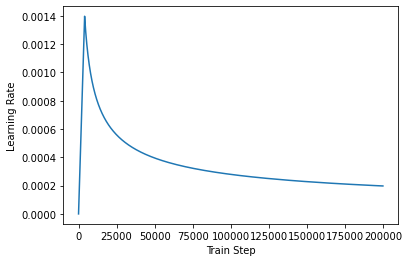

In [24]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

# Project 시작

### transformer를 활용한 챗봇구현

In [25]:
import pandas as pd
import urllib.request
import tensorflow_datasets as tfds
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
import re

In [26]:
train_df

,ko,en
0,제2항을 함께 두는 것이 적절한지에 대하여 논의 과정에서 의문이 제기되기도 하였다.,"In the course of the discussion, questions wer..."
1,문제는 거래가 끊어진 경우에는 실제 거래가 이뤄지지 않기 때문에 이러한 실거래가 자...,"If the transaction is cut off, the actual tran..."
2,이러한 공공 부문 이동기기 개인 영상정보 규율의 문제점을 개선하기 위해 보호 체계 ...,This discussed ways to improve the protection ...
3,그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자...,Since the contents are not easily known and in...
4,매칭정보를 획득하게 되면 통상 ‘ARP spoofing’이라는 해킹기법을 사용한다.,"When matching information is obtained, a hacki..."
...,...,...
9995,이후 현행법과 판례로서는 특히 거래소가 파산한 경우 투자자의 피해구제가 사실상 불가...,"Since then, current law and precedent make it ..."
9996,현재 미국과 중국 간의 무역분쟁에서도 추가 관세 부과 등의 정책 수단을 사용하는 것...,"One example is the use of policy measures, suc..."
9997,주택에 대한 안정성 확보와 주거 환경 개선에 관한 수요는 지속적으로 늘어날 여지가 ...,There is ample room for continuous increase in...
9998,특히 시장성 수신이 발달하지 않은 경우 은행은 대출을 줄이게 된다는 것이 은행대출 ...,"In particular, when marketable reception is no..."


In [27]:
val_df

,ko,en
0,"국경 없는 인터넷의 특 성을 감안하여, 저작권법의 속지적인 특성에도 불구하고 미국 ...",Considering the type regarding the Internet wi...
1,학습자들이 제시한 건의사항을 해결하기 위해 다음과 같은 논의가 필요하다.,The following discussion is needed to resolve ...
2,2011년에 발생한 저축은행 부실사태 이후 관련 연구가 종종 이뤄지고 있다.,Some studies on the period after the savings b...
3,기업의 성장 측정 방식을 선택함에 있어 기업 규모에 따른 편향적인 결과가 도출되는 ...,In selecting a company's growth measurement me...
4,"1인 여행객 중 여성은 52.3%, 남성은 47.7%로 여성이 상대적으로 나 홀로 ...","Among solo travelers, 52.3% were female and 47..."
...,...,...
3995,la plaine'에서도 59마디 중 절반 이상을 차지하는 31마디에 사용되었다.,"In 'la Plaine,' it was used in 31 bars, which ..."
3996,연구자는 완전한 참여자로서 참여관찰을 진행했기에 미술놀이를 놓칠 우려와 연구 참여자...,Because the researcher conducted participatory...
3997,대규모 상장회사들에 대한 경영권 행사에 차질이 발생한다는 것은 지주회사 가치의 심각...,The disruption in the exercise of management r...
3998,2009년 로스쿨이 발족한 이래 2011년부터 2018년까지 총 21회에 걸쳐 변호...,Since the inauguration of the law school in 20...


토큰화를 위해 형태소 분석기를 사용하지 않고, 다른 방법인 학습 기반의 토크나이저를 사용하였습니다.\
원 데이터에서 ?, ., !와 같은 구두점을 미리 처리해두어야 하는데, 구두점들을 단순히 제거할 수도 있겠지만, 여기서는 구두점 앞에 공백. 즉, 띄어쓰기를 추가하여 다른 문자들과 구분하겠습니다.

In [28]:
questions = []
for sentence in train_df['ko']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [29]:
answers = []
for sentence in train_df['en']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [30]:
questions2 = []
for sentence in val_df['ko']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions2.append(sentence)

In [31]:
answers2 = []
for sentence in val_df['en']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers2.append(sentence)

질문과 대답에 대해서 상위 5개만 출력하여 구두점들이 띄어쓰기를 통해 분리되었는지 확인해봅시다.

In [32]:
print(questions[:5])
print(answers[:5])

['제2항을 함께 두는 것이 적절한지에 대하여 논의 과정에서 의문이 제기되기도 하였다 .', '문제는 거래가 끊어진 경우에는 실제 거래가 이뤄지지 않기 때문에 이러한 실거래가 자료조차 찾을 수 없다는 점이다 .', '이러한 공공 부문 이동기기 개인 영상정보 규율의 문제점을 개선하기 위해 보호 체계 및 법제 개선방안을 논의하였다 .', '그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자의 판매 행위는 대단히 불안한 지위에 놓이게 된다 .', '매칭정보를 획득하게 되면 통상 ‘ARP spoofing’이라는 해킹기법을 사용한다 .']
['In the course of the discussion ,  questions were raised as to whether it was appropriate to put Paragraph 2 together .', 'If the transaction is cut off ,  the actual transaction price cannot even be found because the actual transaction will not take place .', 'This discussed ways to improve the protection system and legal system in order to improve such a problem of the regulation of personal image information on mobile devices in the public sector .', "Since the contents are not easily known and involved by the parts business operator ,  intermediate parts manufacturers' sales behavior is placed in a precarious position .", "When matching information is obtained ,  a ha

### 단어 집합 생성

In [33]:
# 서브워드텍스트인코더를 사용하여 질문과 답변을 모두 포함한 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [34]:
# 서브워드텍스트인코더를 사용하여 질문과 답변을 모두 포함한 단어 집합(Vocabulary) 생성
tokenizer2 = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions2 + answers2, target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN2, END_TOKEN2 = [tokenizer2.vocab_size], [tokenizer2.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE2 = tokenizer2.vocab_size + 2

In [35]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8094]
종료 토큰 번호 : [8095]
단어 집합의 크기 : 8096


### 정수 인코딩과 패딩

In [36]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

Tokenized sample question: [2372, 3, 151, 5708, 2358, 258, 125, 221, 28, 829, 1345, 2284, 17, 216, 24, 125, 221, 675, 7380, 112, 1]


In [37]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 decode() 테스트해보기

# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [2372, 3, 151, 5708, 2358, 258, 125, 221, 28, 829, 1345, 2284, 17, 216, 24, 125, 221, 675, 7380, 112, 1]
기존 문장: 반면 ,  실적이 예상보다 부진한 기업의 주요 원인은 내수 부진이라고 응답하였다 .


In [38]:
# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위 X 형태소 분석 단위 X
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

2372 ----> 반면
3 ---->  ,  
151 ----> 실
5708 ----> 적이 
2358 ----> 예상
258 ----> 보다 
125 ----> 부
221 ----> 진
28 ----> 한 
829 ----> 기업의 
1345 ----> 주요 
2284 ----> 원인
17 ----> 은 
216 ----> 내
24 ----> 수 
125 ----> 부
221 ----> 진
675 ----> 이라고 
7380 ----> 응답
112 ----> 하였다
1 ---->  .


In [39]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)
  
  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs

In [40]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter2(inputs, outputs):
  tokenized_inputs2, tokenized_outputs2 = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN2 + tokenizer2.encode(sentence1) + END_TOKEN2
    sentence2 = START_TOKEN2 + tokenizer2.encode(sentence2) + END_TOKEN2

    tokenized_inputs2.append(sentence1)
    tokenized_outputs2.append(sentence2)
  
  # 패딩
  tokenized_inputs2 = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs2, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs2 = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs2, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs2, tokenized_outputs2

In [41]:
questions, answers = tokenize_and_filter(questions, answers)

In [42]:
questions2, answers2 = tokenize_and_filter2(questions2, answers2)

In [43]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (10000, 40)
답변 데이터의 크기(shape) : (10000, 40)


In [44]:
# 0번째 샘플을 임의로 출력
print(questions[0])
print(answers[0])

[8094 6904   12  665  580   15  174  153  591  240 4242  868  686 7870
  989 4258   14 1375 3960   50  112    1 8095    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8094   33    2 6327    4    2 5949    3 2553   69 4335   21    6  366
   27   34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


### 인코더와 디코더의 입력, 그리고 레이블 만들기.

In [45]:
print('단어 집합의 크기(Vocab size): {}'.format(VOCAB_SIZE))
print('전체 샘플의 수(Number of samples): {}'.format(len(questions)))

단어 집합의 크기(Vocab size): 8096
전체 샘플의 수(Number of samples): 10000


In [46]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [47]:
# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset_val = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions2,
        'dec_inputs': answers2[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers2[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset_val = dataset_val.cache()
dataset_val = dataset_val.shuffle(BUFFER_SIZE)
dataset_val = dataset_val.batch(BATCH_SIZE)
dataset_val = dataset_val.prefetch(tf.data.experimental.AUTOTUNE)

In [48]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

[8094   33    2 6327    4    2 5949    3 2553   69 4335   21    6  366
   27   34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[8094   33    2 6327    4    2 5949    3 2553   69 4335   21    6  366
    27   34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
[[  33    2 6327    4    2 5949    3 2553   69 4335   21    6  366   27
    34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


### 트랜스포머 만들기

In [49]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

(1, 8096, 256)
(1, 8096, 256)


In [50]:
# 학습률과 옵티마이저를 정의하고 모델을 컴파일합니다.

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

모델을 학습합니다.

Epoch 1/30
157/157 [==============================] - 117s 717ms/step - loss: 6.8172 - accuracy: 0.0276 - val_loss: 6.6990 - val_accuracy: 0.0426
Epoch 2/30
157/157 [==============================] - 112s 713ms/step - loss: 5.8642 - accuracy: 0.0624 - val_loss: 6.4551 - val_accuracy: 0.0531
Epoch 3/30
157/157 [==============================] - 114s 727ms/step - loss: 5.1437 - accuracy: 0.1091 - val_loss: 6.7420 - val_accuracy: 0.0633
Epoch 4/30
157/157 [==============================] - 112s 711ms/step - loss: 4.6983 - accuracy: 0.1602 - val_loss: 7.3394 - val_accuracy: 0.0519
Epoch 5/30
157/157 [==============================] - 112s 716ms/step - loss: 4.3159 - accuracy: 0.1842 - val_loss: 7.8869 - val_accuracy: 0.0525
Epoch 6/30
157/157 [==============================] - 114s 724ms/step - loss: 4.0707 - accuracy: 0.1997 - val_loss: 8.1355 - val_accuracy: 0.0501
Epoch 7/30
157/157 [==============================] - 133s 847ms/step - loss: 3.8697 - accuracy: 0.2163 - val_loss: 8.8266 -

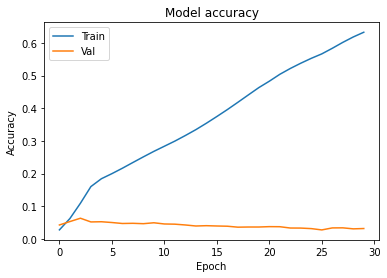

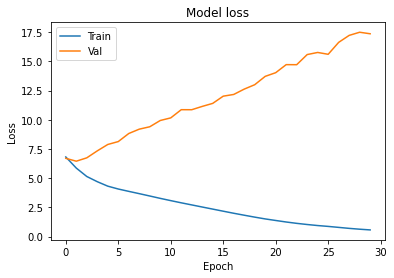

In [51]:
EPOCHS = 30

# 모델 훈련
results = model.fit(dataset, epochs=EPOCHS, validation_data=dataset_val)
print(results.history)

# 훈련 과정 시각화 (정확도)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 훈련 과정 시각화 (손실)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [52]:
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    3126784     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

# 챗봇 평가하기

In [53]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)


def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [54]:
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [55]:
output = predict('그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자의 판매 행위는 대단히 불안한 지위에 놓이게 된다.')

'''
답 문장: ince the contents are not easily known and involved by the parts business operator, intermediate parts manufacturers' sales behavior is placed in a precarious position.
'''

Input: 그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자의 판매 행위는 대단히 불안한 지위에 놓이게 된다.
Output: The contents are placed on the contents of the partnership ,  not the seller is placed in a cargo regarding the particle and high level of a carbond .


"\n답 문장: ince the contents are not easily known and involved by the parts business operator, intermediate parts manufacturers' sales behavior is placed in a precarious position.\n"

In [56]:
output = predict("AAA는 '취미' 개념을 인간의 마음이 '사고권'과 분리되지 않은 상태를 설명하기 위해 도입함으로써 그리스의 교육 이념으로 명명되었던 칼로카가티아의 의미를 현대적으로 재해석하고 있다는 느낌을 준다.")

'''
정답 문장: y introducing the concept of “hobby” to explain the state in which the human mind is not separated from the 
“right to think,” AAA gives the impression that it is reinterpreting the meaning of Kalos kagathos, 
which was named as the Greek educational ideology, in a modern way.
'''

Input: AAA는 '취미' 개념을 인간의 마음이 '사고권'과 분리되지 않은 상태를 설명하기 위해 도입함으로써 그리스의 교육 이념으로 명명되었던 칼로카가티아의 의미를 현대적으로 재해석하고 있다는 느낌을 준다.
Output: AAA stated that sensory factors in the reputation of human rights in humanitime human eggs ,  mind ,  and impulse itself did not describe it by AAA .


'\n정답 문장: y introducing the concept of “hobby” to explain the state in which the human mind is not separated from the \n“right to think,” AAA gives the impression that it is reinterpreting the meaning of Kalos kagathos, \nwhich was named as the Greek educational ideology, in a modern way.\n'

In [57]:
output = predict("우리는 이제 쌍곡기하학에서 삼각형의 각도의 합계가 π가 되는지 안되는지 볼 수 있는 위치에 있다.")

'''
정답 문장: we are now in a position to see whether the angles of a triangle in hyperbolic geometry add up to π or not.
'''

Input: 우리는 이제 쌍곡기하학에서 삼각형의 각도의 합계가 π가 되는지 안되는지 볼 수 있는 위치에 있다.
Output: We are now in a position to see whether the angles of a triangle in hyperbolic geometry add as a triangle .


'\n정답 문장: we are now in a position to see whether the angles of a triangle in hyperbolic geometry add up to π or not.\n'

In [58]:
output = predict("프로젝트 성공할까 ? ")

'''
정답 문장: Will the project succeed?
'''

Input: 프로젝트 성공할까 ? 
Output: successful used ,  the pirate of the pile class method .


'\n정답 문장: Will the project succeed?\n'

In [59]:
output = predict("이 문장도 성공할까? ")

'''
정답 문장: Will this sentence also work?
'''

Input: 이 문장도 성공할까? 
Output: Can this physis us sure successful ?


'\n정답 문장: Will this sentence also work?\n'

형태소 분석을 활용하지 못해서 번역에서 약간 부족한 모습을 보여주었지만, 추후 형태소분석 부분을 추가하면 괜찮은 결과를 나타내줄것으로 예상됨.